In [1]:
import numpy as np
import pandas as pd
import AKCRiskKit as ark
import ipywidgets as widgets
%load_ext autoreload
%autoreload 2

In [47]:
rates = np.linspace(0.01,0.1,num=20)
prices = [ark.bond_price(10,1000,0.05,2,rate) for rate in rates]

<AxesSubplot:title={'center':'Price of 10y bond with diff interest rates'}>

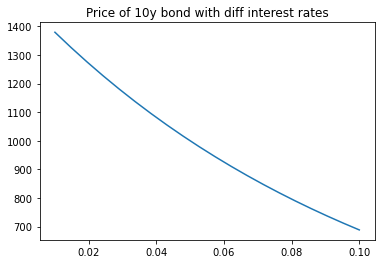

In [48]:
pd.DataFrame(data=prices, index=rates).plot(title="Price of 10y bond with diff interest rates",legend=False)

In [82]:
cf = ark.bond_cash_flow(3,1000,0.06,2)
ark.macaulay_duration(cf,0.06/2)

5.579707187194534

## Duration matching

In [84]:
liabilities = pd.Series(data=[100000,100000],index=[10,12])

In [117]:
ark.macaulay_duration(liabilities,0.04)

10.960799385088393

##### Assume you have only a 10 and 15 year bond

In [87]:
md_10 = ark.macaulay_duration(ark.bond_cash_flow(10,1000,0.05,1),0.04)
md_20 = ark.macaulay_duration(ark.bond_cash_flow(20,1000,0.05,1),0.04)

In [116]:
md_10, md_20

(8.190898824083233, 13.544718122145921)

In our case the fraction in the short duration asset $w_s$ should be such that:

$$ w_s \times  md_10 + (1-w_s) \times md_20 = md_liab $$

Rearranging,

$$ w_s = \frac{d_l-d_t}{d_l-d_s} $$



In [94]:
short_bond_cf= ark.bond_cash_flow(10,1000,0.05,1)
long_bond_cf= ark.bond_cash_flow(20,1000,0.05,1)

In [161]:
w_s = ark.match_duration(liabilities,short_bond_cf,long_bond_cf,0.04)
w_s

0.48263092069478974

In [162]:
p_short = ark.bond_price(10,1000,0.05,1,0.04)
p_long = ark.bond_price(20,1000,0.05,1,0.04)
a_0=130000
p_flows = pd.concat([a_0*w_s*short_bond_cf/float(p_short),a_0*(1-w_s)*long_bond_cf/float(p_long)])
ark.macaulay_duration(p_flow,0.04)

10.960799385088393

In [163]:
cfr = ark.funding_ratio(p_flows,liabilities,0.04)
float(cfr)

0.9998760012192478

In [166]:
rates = np.linspace(0,0.1,num=20)
l_assets = a_0*long_bond_cf/float(p_long)
s_assets = a_0*short_bond_cf/float(p_short)

fr_changes = pd.DataFrame({
    "Long Bond": [float(ark.funding_ratio(l_assets,liabilities, rate)) for rate in rates],
    "Short Bond": [float(ark.funding_ratio(s_assets,liabilities, rate)) for rate in rates],
    "Duration Matched Bond": [float(ark.funding_ratio(p_flows,liabilities, rate)) for rate in rates] 
},index=rates)



<AxesSubplot:title={'center':'Funding ratios with changes in interest rates'}>

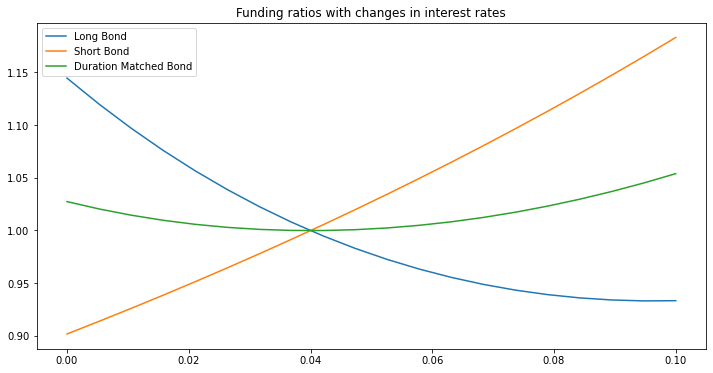

In [167]:
fr_changes.plot(title="Funding ratios with changes in interest rates",figsize=(12,6))